In [45]:
import nltk
import numpy as np
import seaborn as sns
import pandas as pd

In [46]:
kaggle_df = pd.read_csv(r'C:\Users\vishw\Downloads\archive (1)\spam_ham_dataset.csv')
df1 = pd.read_csv(r'C:\Users\vishw\OneDrive\Desktop\Combined_texts_main.csv')
df2 = pd.read_csv(r'C:\Users\vishw\OneDrive\Desktop\Combined_test_texts.csv')

In [47]:
kaggle_df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [48]:
kaggle_df.drop(columns = ['Unnamed: 0', 'label'], inplace = True)
kaggle_df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [49]:
kaggle_df.isnull().sum()

text         0
label_num    0
dtype: int64

In [50]:
kaggle_df.duplicated().sum()

178

In [51]:
kaggle_df = kaggle_df.drop_duplicates(keep = 'first')

In [52]:
#getting just the subject
subject = kaggle_df['text'].str.replace("Subject:", '')
#adding a new row
kaggle_df["Main_Content"] = subject
kaggle_df.head()

C:\Users\vishw\AppData\Local\Temp\ipykernel_15696\2667031855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_df["Main_Content"] = subject


,text,label_num,Main_Content
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter # : 988291\r\nthis is ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001\r\n( see attache..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"neon retreat\r\nho ho ho , we ' re around to ..."
3,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main t..."
4,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs\r\nthis deal is to book t...


In [53]:
transformed_kaggle_df = pd.DataFrame({'Main_Content': kaggle_df['Main_Content'], 'Label': kaggle_df['label_num']})

In [54]:
combined_df = pd.concat([df1, df2, transformed_kaggle_df], ignore_index=True)
combined_df

,Main_Content,Label
0,From Date Wed 21 Aug 2002 023656 0400 Exmh7785...,0
1,From Robert Elz Date Wed 21 Aug 2002 150107 07...,0
2,OuchIll get right on it From Robert Elz Date W...,0
3,On Wed 21 Aug 2002 150107 0700 Robert Elz said...,0
4,From Chris Garrigues Date Wed 21 Aug 2002 1017...,0
...,...,...
9094,"fw : crosstex energy , driscoll ranch # 1 , #...",0
9095,put the 10 on the ft\r\nthe transport volumes...,0
9096,3 / 4 / 2000 and following noms\r\nhpl can ' ...,0
9097,industrial worksheets for august 2000 activit...,0


In [55]:
combined_df.isnull().sum()

Main_Content    33
Label            0
dtype: int64

In [56]:
combined_df.dropna(inplace=True)

In [57]:
combined_df.isnull().sum()

Main_Content    0
Label           0
dtype: int64

In [58]:
combined_df.duplicated().sum()

1296

In [59]:
combined_df = combined_df.drop_duplicates(keep = 'first')

In [60]:
values = combined_df['Label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100 #ham
percentage_1 = (values[1]/ total) *100 #spam

print('percentage of ham :' ,percentage_0)
print('percentage of spam :' ,percentage_1)

percentage of ham : 66.52509652509653
percentage of spam : 33.47490347490347


In [61]:
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))



nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()



import string

def process_text(content):
    filtered_list = []
    remove_punc = []
    content = content.lower()
    content = word_tokenize(content)
    for word in content:
        remove_punc = [word for word in content if word not in string.punctuation] # remove punctuation
    
    content = remove_punc
    
    # remove_punc.clear()
    
    for word in content:
        if word.casefold() not in stop_words:
            filtered_list.append(word)

    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_list]
    # stemmed_words = [stemmer.stem(word) for word in filtered_list]
    content.clear()
    remove_punc.clear()
    
    return ' '.join(lemmatized_words)
    # return ' '.join(stemmed_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [62]:
combined_df['Main_Content'] = combined_df['Main_Content'].astype(str)
combined_df['processed_text'] = combined_df['Main_Content'].apply(process_text)
print(combined_df.shape)
combined_df.describe()

C:\Users\vishw\AppData\Local\Temp\ipykernel_15696\2788932550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Main_Content'] = combined_df['Main_Content'].astype(str)


(7770, 3)


C:\Users\vishw\AppData\Local\Temp\ipykernel_15696\2788932550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['processed_text'] = combined_df['Main_Content'].apply(process_text)


,Label
count,7770.000000
mean,0.334749
std,0.471933
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


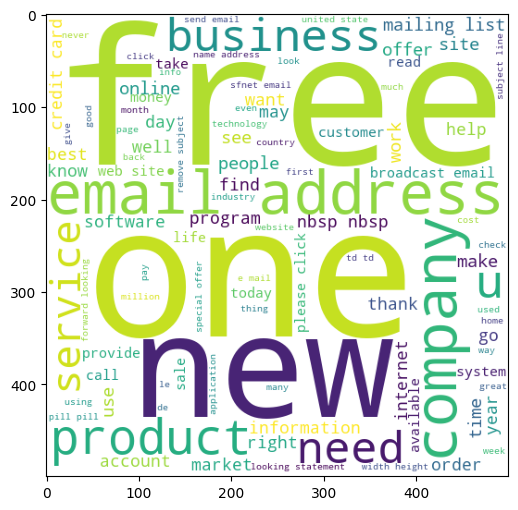

In [63]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(combined_df[combined_df['Label'] == 1]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

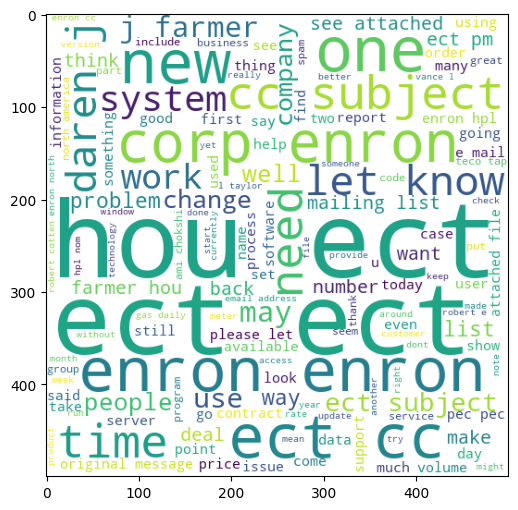

In [64]:
ham_wc = wc.generate(combined_df[combined_df['Label'] == 0]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [65]:
spam_carpos = []
for sentence in combined_df[combined_df['Label'] == 1]['processed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [66]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

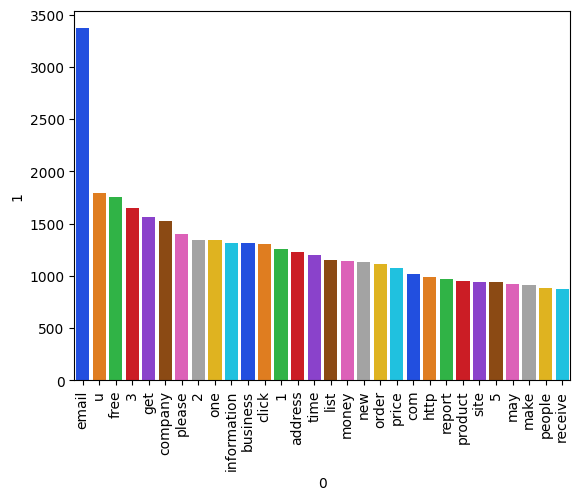

In [67]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [68]:
ham_carpos = []
for sentence in combined_df[combined_df['Label'] == 0]['processed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [69]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

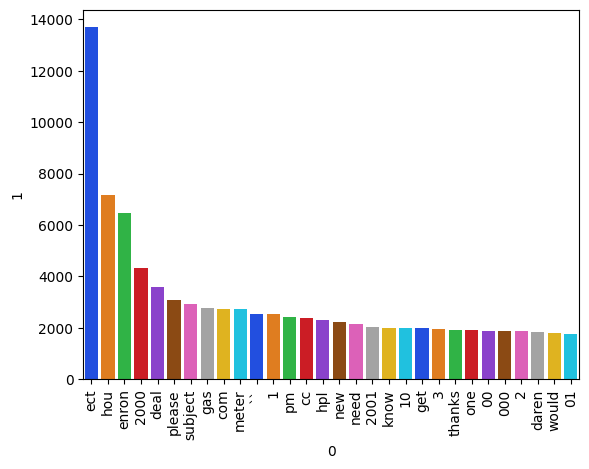

In [70]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [71]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [72]:
from sklearn.model_selection import train_test_split

X = combined_df['processed_text'].astype(str)
X_tfidf = tfidf.fit_transform(X)
labels = combined_df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.3, random_state=50)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Create and fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred = logistic_model.predict(X_test)
# Evaluate model
LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.954954954954955
Precision: 0.9381443298969072


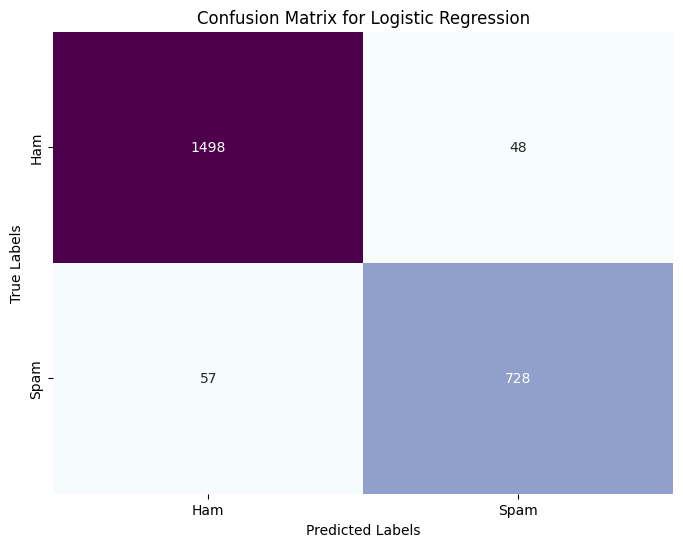

In [74]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  


plt.show()

In [75]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Predict on test data
y_pred = NB_model.predict(X_test)
# Evaluate model
NB_accuracy = accuracy_score(y_test, y_pred)
NB_precision = precision_score(y_test, y_pred)
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)

Accuracy: 0.9257829257829258
Precision: 0.8501144164759725


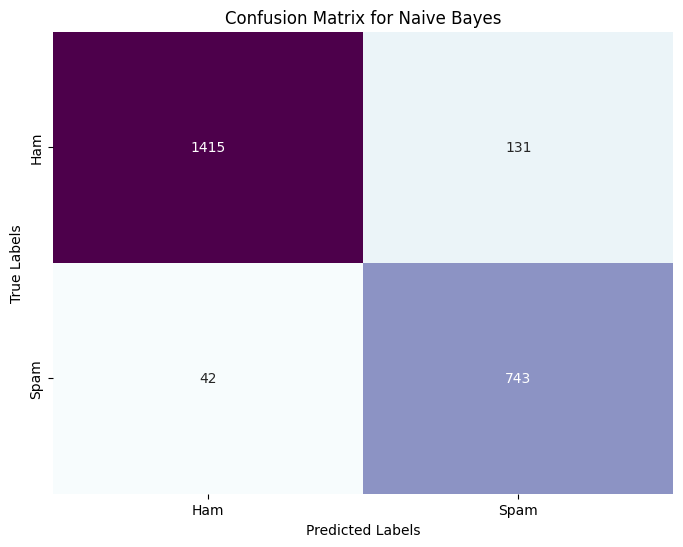

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  


plt.show()

In [77]:
from sklearn.svm import SVC

num_features = X_train.shape[1]
SVM = SVC()
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)

Accuracy: 0.9661089661089661
Precision: 0.9502551020408163


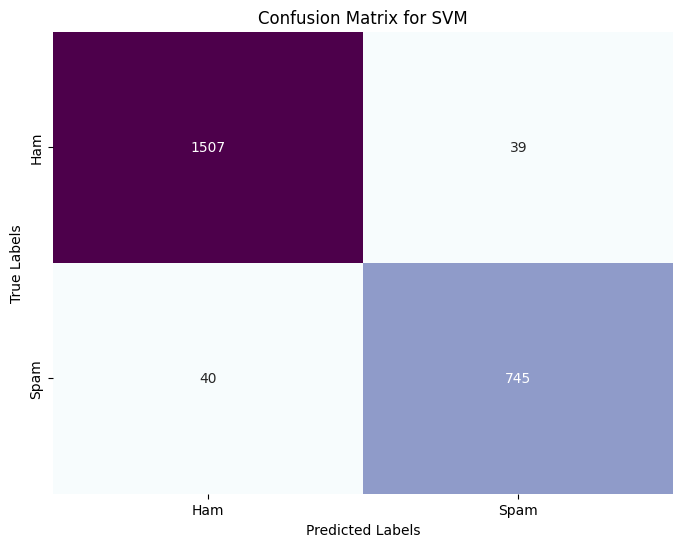

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [79]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth =50)
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

DT_accuracy = accuracy_score(y_test, y_pred)
DT_precision = precision_score(y_test, y_pred)
print("Accuracy:", DT_accuracy)
print("Precision:", DT_precision)

Accuracy: 0.8978978978978979
Precision: 0.8347613219094248


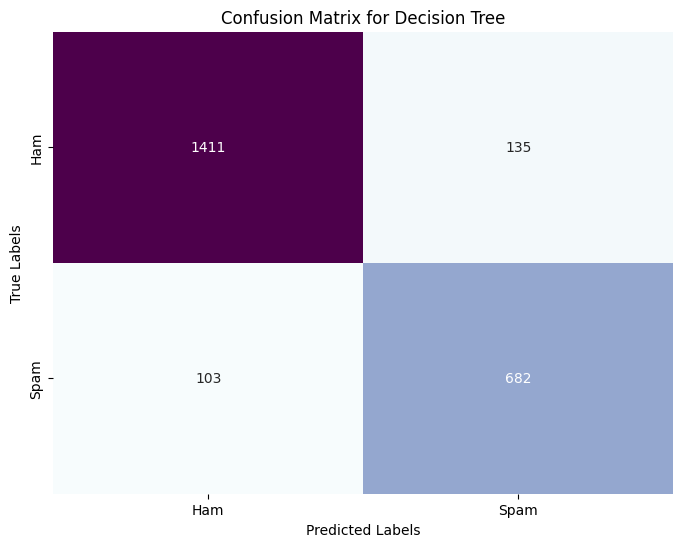

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [81]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 1)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_precision = precision_score(y_test, y_pred)
print("Accuracy:", KNN_accuracy)
print("Precision:", KNN_precision)

Accuracy: 0.7516087516087516
Precision: 0.5762962962962963


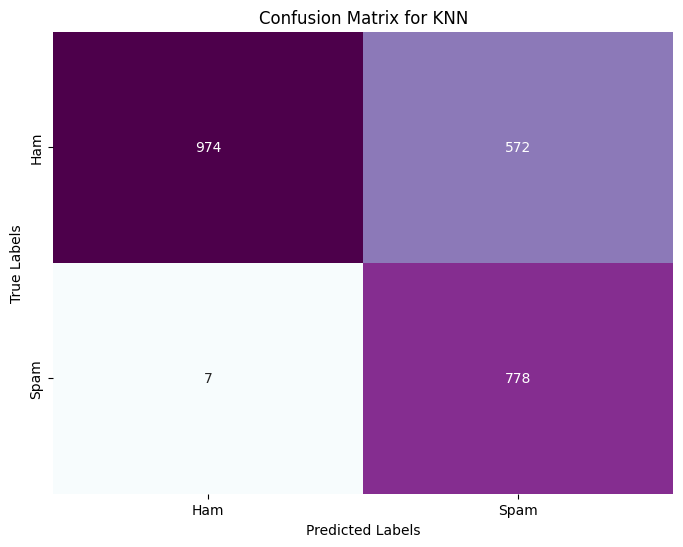

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100, random_state = 2 )
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)
print("Precision:", RF_precision)

Accuracy: 0.9515229515229515
Precision: 0.9127764127764127


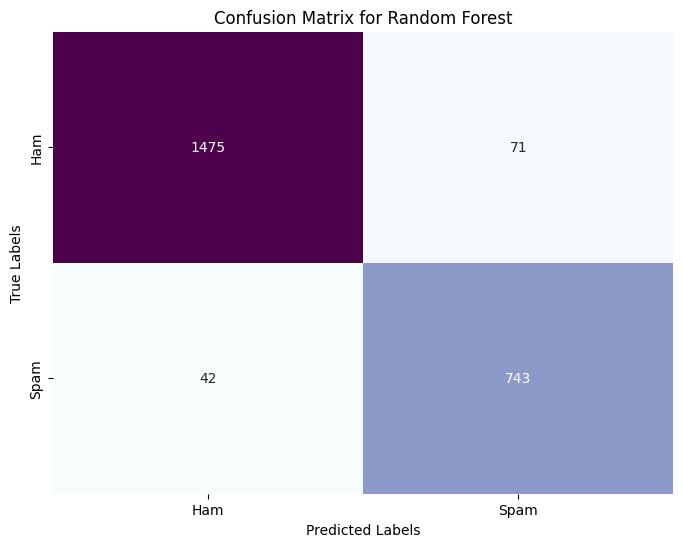

In [84]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [85]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Naive Bayes', 'Accuracy': NB_accuracy, 'Precision': NB_precision},
    {'Model': 'SVM', 'Accuracy': SVM_accuracy, 'Precision': SVM_precision},
    {'Model': 'Decision Tree', 'Accuracy': DT_accuracy, 'Precision': DT_precision},
    {'Model': 'KNN', 'Accuracy': KNN_accuracy, 'Precision': KNN_precision},
    {'Model': 'Random Forest', 'Accuracy': RF_accuracy, 'Precision': RF_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df

,Model,Accuracy,Precision
1,SVM,0.966109,0.950255
2,Logistic Regression,0.954955,0.938144
3,Random Forest,0.951523,0.912776
4,Naive Bayes,0.925783,0.850114
5,Decision Tree,0.897898,0.834761
6,KNN,0.751609,0.576296


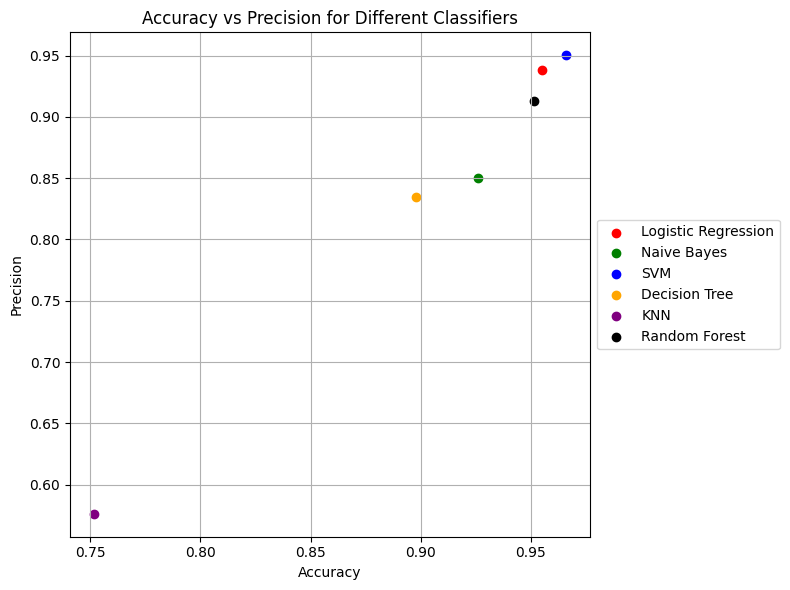

In [86]:
import matplotlib.pyplot as plt

# Extract accuracy and precision values
accuracy_values = df['Accuracy']
precision_values = df['Precision']
model_names = df['Model']


model_colors = {
    'Logistic Regression': 'red',
    'SVM': 'blue',
    'Naive Bayes': 'green',
    'Decision Tree': 'orange',
    'KNN': 'purple',
    'Random Forest': 'black'
}

# Create scatter plot with color coding based on model names
plt.figure(figsize=(8, 6))
for idx, model in enumerate(model_names):
    acc = accuracy_values[idx]
    prec = precision_values[idx]
    color = model_colors.get(model)
    plt.scatter(acc, prec, color=color, label=model)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.title('Accuracy vs Precision for Different Classifiers')

# Create legend on the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
#save model using joblib
import joblib

joblib.dump(SVM, 'HOS_SVM_ThreeDataset.pkl')
joblib.dump(RF, 'HOS_RF_ThreeDataset.pkl')
joblib.dump(logistic_model, 'HOS_LR_ThreeDataset.pkl')

joblib.dump(tfidf, 'vectorizer2.pkl')

['vectorizer2.pkl']

In [88]:
#word2vec
#bagofwords
#run on top 3 classification models
#save the vectorizer